<a href="https://colab.research.google.com/github/ddc-datascience-01/project-3-jolonia/blob/master/Project_3_Data_Cleaning_JO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Box office revenue prediction
In this project we will use machine learning and decision tree modeling to predict box office revenue.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df = pd.read_csv('/content/drive/My Drive/Deep Dive Data Science - Cohort 1/Data/box_off_train.csv')
train_df.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,/cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg,"[{'name': 'Lions Gate Films', 'id': 35}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


## We will begin with exploratory data analysis. 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

Here we can see that movies in english do better than movies in other languages.

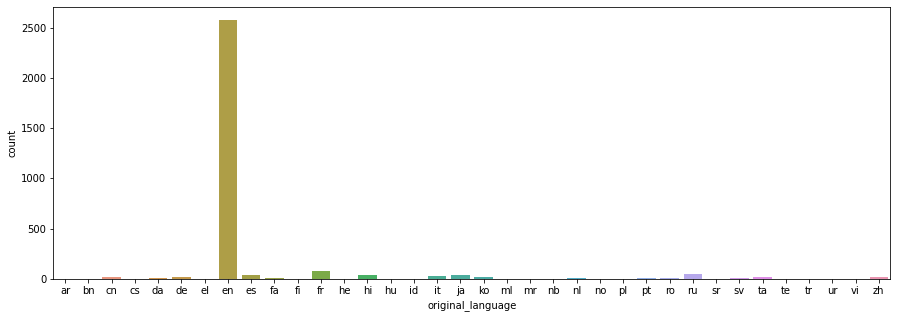

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(train_df['original_language'].sort_values())
plt.show()

Here we show the average runtime is is right around 110 minutes. 

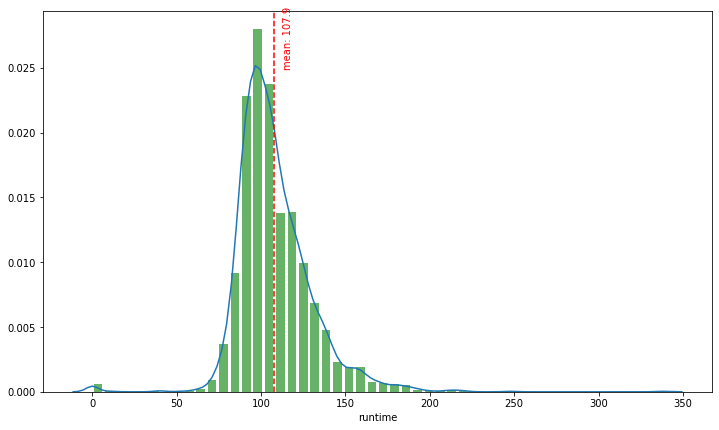

In [7]:
plt.figure(figsize=(12,7))
ax = sns.distplot(train_df["runtime"].dropna(),hist_kws={"rwidth":0.75,"alpha": 0.6, "color": "g"})
plt.axvline(x=runtime_mean, c="red", linestyle="--")
plt.text(runtime_mean+5, 0.025,"mean: {0:0.1f}".format(runtime_mean), color="red", rotation=90)
plt.show()

In [0]:
After initial analysis we begin to clean the data.

In [0]:
def genres_preprocessing(elem):
    if pd.isnull(elem):   
      str1 = ' '
    
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
      ll = str1.split(",")[1::2]
      str1 = ''
      for ele in ll:
       str1 += ele
       str1 += "|"
    return str1[:-1]

In [0]:
train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))

In [11]:
train_df['genres_processed']

0                              Comedy
1         Comedy|Drama|Family|Romance
2                               Drama
3                      Thriller|Drama
4                     Action|Thriller
                    ...              
2995                   Comedy|Romance
2996                      Drama|Music
2997    Crime|Action|Mystery|Thriller
2998                   Comedy|Romance
2999          Thriller|Action|Mystery
Name: genres_processed, Length: 3000, dtype: object

In [12]:
cleaned_genres = train_df.genres_processed.str.split('|', expand=True).stack()

train_df3 = pd.get_dummies(cleaned_genres, prefix='g').groupby(level=0, sort = False).sum()

df2 = pd.concat([train_df3,train_df], axis =1)
df2.head()

,g_,g_Action,g_Adventure,g_Animation,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Family,g_Fantasy,g_Foreign,g_History,g_Horror,g_Music,g_Mystery,g_Romance,g_ScienceFiction,g_TVMovie,g_Thriller,g_War,g_Western,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_processed
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 45 columns):
g_                       3000 non-null uint8
g_Action                 3000 non-null uint8
g_Adventure              3000 non-null uint8
g_Animation              3000 non-null uint8
g_Comedy                 3000 non-null uint8
g_Crime                  3000 non-null uint8
g_Documentary            3000 non-null uint8
g_Drama                  3000 non-null uint8
g_Family                 3000 non-null uint8
g_Fantasy                3000 non-null uint8
g_Foreign                3000 non-null uint8
g_History                3000 non-null uint8
g_Horror                 3000 non-null uint8
g_Music                  3000 non-null uint8
g_Mystery                3000 non-null uint8
g_Romance                3000 non-null uint8
g_ScienceFiction         3000 non-null uint8
g_TVMovie                3000 non-null uint8
g_Thriller               3000 non-null uint8
g_War                    3000 non-null

In [14]:
train_df['genres_processed']

0                              Comedy
1         Comedy|Drama|Family|Romance
2                               Drama
3                      Thriller|Drama
4                     Action|Thriller
                    ...              
2995                   Comedy|Romance
2996                      Drama|Music
2997    Crime|Action|Mystery|Thriller
2998                   Comedy|Romance
2999          Thriller|Action|Mystery
Name: genres_processed, Length: 3000, dtype: object

In [15]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'genres_processed'],
      dtype='object')

In [16]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_processed
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller


In [0]:
import ast
res = ast.literal_eval(train_df.crew[0].replace('[','').replace(']',''))


In [18]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_processed
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller


Here we have decided to drop these variables because they are categorical and hold little if any added value to our model. 

In [0]:
train_df.drop('status', axis=1, inplace=True)

In [0]:
train_df.drop('homepage', axis=1, inplace=True)

In [0]:
train_df.drop('id', axis=1, inplace=True)

In [0]:
train_df.drop('imdb_id', axis=1, inplace=True)

In [0]:
train_df.drop('poster_path', axis=1, inplace=True)

In [0]:
train_df.drop('tagline', axis=1, inplace=True)

In [0]:
train_df.drop('original_title', axis=1, inplace=True)

In [0]:
train_df.drop('overview', axis=1, inplace=True)

In [0]:
train_df.drop('Keywords', axis=1, inplace=True)

In [28]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller


In [0]:
res = ast.literal_eval(train_df.belongs_to_collection	[0].replace('[','').replace(']',''))


In [30]:
jobName = 'job'
jobTitle = 'Director'
fieldName = 'name'

string  = str(train_df.crew[7]).replace('[','').replace(']','')
res     = ast.literal_eval(string)
outputs = []
if isinstance(res,dict):
  if res[jobName]==jobTitle:
    outputs.append(res[fieldName])
else:
  for idx in (np.arange(0,(len(res)-1))):
    if res[idx][jobName]==jobTitle:
      outputs.append(res[idx][fieldName])

outputs

['Jehane Noujaim']

In [0]:
def field_extract_crew(elem, jobName, jobTitle, fieldName):
  nullColumn = pd.isnull(elem)
  if nullColumn:
    outputs = ' '
  else:
    string  = str(elem).replace('[','').replace(']','')
    res     = ast.literal_eval(string)
    outputs = []
    if isinstance(res,dict):
      if res[jobName]==jobTitle:
        outputs.append(res[fieldName])
    else:
      for idx in (np.arange(0,(len(res)-1))):
        if res[idx][jobName]==jobTitle:
          outputs.append(res[idx][fieldName])
  
  return outputs

In [0]:
train_df['director_processed'] = train_df.crew.apply(lambda elem: field_extract_crew(elem,'job','Director','name'))

In [33]:
import ast

res = ast.literal_eval(train_df.crew[0].replace('[','').replace(']',''))

(res[1])

{'credit_id': '52fe4ee7c3a36847f82afad7',
 'department': 'Directing',
 'gender': 2,
 'id': 3227,
 'job': 'Director',
 'name': 'Steve Pink',
 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}

In [34]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed,director_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,[Steve Pink]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance,[Garry Marshall]
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,[Damien Chazelle]
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama,[Sujoy Ghosh]
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller,[Jong-seok Yoon]


In [0]:
train_df['producer_processed'] = train_df.crew.apply(lambda elem: field_extract_crew(elem,'job','Producer','name'))

In [36]:
train_df.producer_processed

0                                          [Andrew Panay]
1       [Whitney Houston, Mario Iscovich, Debra Martin...
2       [David Lancaster, Michel Litvak, Jason Blum, H...
3                                           [Sujoy Ghosh]
4                                                      []
                              ...                        
2995                                  [James G. Robinson]
2996                                      [Lars J√∂nsson]
2997    [Stephanie Austin, Shane Black, Renny Harlin, ...
2998        [Danny DeVito, Michael Shamberg, Stacey Sher]
2999    [Doug Davison, Roy Lee, Ellen Goldsmith-Vein, ...
Name: producer_processed, Length: 3000, dtype: object

In [0]:
def field_extract_genres(elem, fieldName):
  string  = str(elem).replace('[','').replace(']','')
  res     = ast.literal_eval(string)
  outputs = []
  for idx in (np.arange(0,(len(res)-1))):  
    outputs.append(res[idx][fieldName])
  
  return outputs

In [0]:
def genres_preprocessing(elem):
    if pd.isnull(elem):
      one = ' '
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace('name','').replace('id','').replace(':','')
      one = str1.split(',')[1::2]
    return one

In [39]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed,director_processed,producer_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,[Steve Pink],[Andrew Panay]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama,[Sujoy Ghosh],[Sujoy Ghosh]
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller,[Jong-seok Yoon],[]


In [40]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed,director_processed,producer_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,[Steve Pink],[Andrew Panay]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama,[Sujoy Ghosh],[Sujoy Ghosh]
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller,[Jong-seok Yoon],[]


In [41]:

res2 = ast.literal_eval(train_df.cast[0].replace('[','').replace(']',''))
(res2[1])

{'cast_id': 5,
 'character': 'Nick',
 'credit_id': '52fe4ee7c3a36847f82afaeb',
 'gender': 2,
 'id': 64342,
 'name': 'Craig Robinson',
 'order': 1,
 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}

In [0]:
def belongs_to_collection_preprocessing(elem):
    if pd.isnull(elem):
      one = ' '
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace('name','').replace('id','').replace(':','')
      one = str1.split(',')[1::2]
    return one

In [0]:
def string_to_1(elem):
  if isinstance(elem,str):
    elem1 = 1
  
  else:
    elem1 = 0 
    
  return elem

In [45]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed,director_processed,producer_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,[Steve Pink],[Andrew Panay]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama,[Sujoy Ghosh],[Sujoy Ghosh]
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller,[Jong-seok Yoon],[]


In [46]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed,director_processed,producer_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,[Steve Pink],[Andrew Panay]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy|Drama|Family|Romance,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller|Drama,[Sujoy Ghosh],[Sujoy Ghosh]
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action|Thriller,[Jong-seok Yoon],[]


In [0]:
def field_extract_crew(elem, jobName, jobTitle, fieldName):
  
  
  nullColumn = pd.isnull(elem)
  outputs = ' '
  if nullColumn:
    outputs = ' '
  else:
    
    
    string  = str(elem).replace('[','').replace(']','')
    res     = ast.literal_eval(string)
    
    
    if isinstance(res,dict):
      if res[jobName]==jobTitle:
        outputs = res[fieldName]
    
    
    else:
      for idx in (np.arange(0,(len(res)-1))):
        if res[idx][jobName]==jobTitle:
          outputs = res[idx][fieldName]
  
  return outputs

In [0]:
train_df['director_processed'] = train_df.crew.apply(lambda elem: field_extract_crew(elem,'job','Director','name'))
train_df['director_processed'].fillna = 0

In [49]:
field_extract_crew(train_df.crew[7],'job','Director','name')

'Jehane Noujaim'

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['director_processed'])

train_df['director_processed_num'] = le.transform(train_df['director_processed'])

In [51]:
train_df.director_processed.value_counts()

                    90
Clint Eastwood      11
Ron Howard          11
Steven Spielberg    10
Blake Edwards        9
                    ..
Rajiv Menon          1
Lance Rivera         1
Robert M. Young      1
Roberts Gannaway     1
Ma√Øwenn             1
Name: director_processed, Length: 1822, dtype: int64

In [52]:
df2[df2.duplicated(['title'])].shape

(31, 45)

In [0]:
def field_extract_productco_str(elem, fieldName):

  nullColumn = pd.isnull(elem)
  outputs = ''
  if nullColumn:
    outputs = 'None'
  else:
    
    string  = str(elem).replace('[','').replace(']','')
    res     = ast.literal_eval(string)
    outputs = ''

    if isinstance(res,dict):
     
      outputs = res[fieldName] + '|'

    else:
      for idx in (np.arange(0,(len(res)))):  
       
        outputs = outputs + res[idx][fieldName] + '|'
  
  outputs = outputs[:-1]

  return outputs

In [0]:
def field_extract_productco_str(elem, fieldName):

  nullColumn = pd.isnull(elem)
  outputs = ''
  if nullColumn:
    outputs = 'None'
  else:
    
    string  = str(elem).replace('[','').replace(']','')
    res     = ast.literal_eval(string)
    outputs = ''

    if isinstance(res,dict):
     
      outputs = res[fieldName] + '|'

    else:
      for idx in (np.arange(0,(len(res)))):  
       
        outputs = outputs + res[idx][fieldName] + '|'
  
  outputs = outputs[:-1]

  return outputs

In [55]:
field_extract_productco_str(train_df.production_companies[0],'name')

'Paramount Pictures|United Artists|Metro-Goldwyn-Mayer (MGM)'

In [0]:
train_df['productCo_processed'] = train_df.production_companies.apply(lambda elem: field_extract_productco_str(elem,'name'))

In [0]:
le = LabelEncoder()
le.fit(train_df['productCo_processed'])

train_df['productCo_processed_num'] = le.transform(train_df['productCo_processed'])

In [58]:
cleaned_genres = train_df.genres_processed.str.split('|', expand=True).stack()

train_df3 = pd.get_dummies(cleaned_genres, prefix='genre:').groupby(level=0, sort = False).sum()

df2 = pd.concat([train_df3,train_df], axis =1)
df2.head().T

,0,1,2,3,4
genre:_,0,0,0,0,0
genre:_Action,0,0,0,0,1
genre:_Adventure,0,0,0,0,0
genre:_Animation,0,0,0,0,0
genre:_Comedy,1,1,0,0,0
genre:_Crime,0,0,0,0,0
genre:_Documentary,0,0,0,0,0
genre:_Drama,0,1,1,1,0
genre:_Family,0,1,0,0,0
genre:_Fantasy,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [60]:
df2.columns


Index(['genre:_', 'genre:_Action', 'genre:_Adventure', 'genre:_Animation',
       'genre:_Comedy', 'genre:_Crime', 'genre:_Documentary', 'genre:_Drama',
       'genre:_Family', 'genre:_Fantasy', 'genre:_Foreign', 'genre:_History',
       'genre:_Horror', 'genre:_Music', 'genre:_Mystery', 'genre:_Romance',
       'genre:_ScienceFiction', 'genre:_TVMovie', 'genre:_Thriller',
       'genre:_War', 'genre:_Western', 'belongs_to_collection', 'budget',
       'genres', 'original_language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'title', 'cast', 'crew', 'revenue', 'genres_processed',
       'director_processed', 'producer_processed', 'director_processed_num',
       'productCo_processed', 'productCo_processed_num'],
      dtype='object')

In [0]:
df2.drop('belongs_to_collection', axis=1, inplace=True)


In [0]:
df2.drop('genres', axis=1,inplace=True )

In [0]:
df2.drop('spoken_languages', axis = 1, inplace=True)

In [0]:
df2.drop('original_language',axis=1,inplace=True)

In [0]:
df2.drop('production_companies', axis=1,inplace=True)

In [0]:
df2.drop('production_countries',axis=1,inplace=True)

In [0]:
df2.drop('release_date',axis=1, inplace= True)

In [0]:
df2.drop('title',axis=1,inplace=True)

In [0]:
df2.drop('cast', axis=1, inplace=True)

In [0]:
df2.drop('crew',axis=1, inplace=True)

In [0]:
df2.drop('genres_processed', axis =1, inplace=True)

In [0]:
df2.drop('director_processed', axis= 1, inplace=True)

In [0]:
df2.drop('producer_processed', axis= 1, inplace=True)

In [0]:
#df2.drop('popularity',axis = 1, inplace= True)

In [0]:
df2.drop('productCo_processed',axis=1, inplace= True)

In [0]:
nan_values = df2.isna()

In [0]:
nan_columns = nan_values.any()


In [0]:
columns_with_nan = df2.columns[nan_columns].tolist()

In [79]:
columns_with_nan

['runtime']

In [0]:
df2.drop('runtime', axis=1,inplace=True)

In [81]:
df2.columns

Index(['genre:_', 'genre:_Action', 'genre:_Adventure', 'genre:_Animation',
       'genre:_Comedy', 'genre:_Crime', 'genre:_Documentary', 'genre:_Drama',
       'genre:_Family', 'genre:_Fantasy', 'genre:_Foreign', 'genre:_History',
       'genre:_Horror', 'genre:_Music', 'genre:_Mystery', 'genre:_Romance',
       'genre:_ScienceFiction', 'genre:_TVMovie', 'genre:_Thriller',
       'genre:_War', 'genre:_Western', 'budget', 'popularity', 'revenue',
       'director_processed_num', 'productCo_processed_num'],
      dtype='object')

These variable hold the the most value and will be used to train the model.

In [0]:

data = pd.DataFrame(df2)                   
X = df2.drop('revenue', axis =1)
y = pd.DataFrame(df2['revenue'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)

Model fit is at 92 percent. 

In [83]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)
model.fit(X_train, y_train)

model_score = model.score(X_train, y_train)
model_score

0.9239652977396753

In [0]:
df2['revenue'] = np.log1p(df2['revenue'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split (df2.drop('revenue',axis =1),df2['revenue'],test_size=0.1,random_state=42)

In [0]:
def rmse(y_pred,y_true):
    return np.sqrt(mean_squared_error(y_pred,y_true))
def print_rf_score(model):
    print(f'Train R2:   {model.score(X_train,y_train)}')
    print(f'Valid R2:   {model.score(X_test, y_test)}')
    print(f'Train RMSE: {rmse(model.predict(X_train), y_train)}')
    print(f'Valid RMSE: {rmse(model.predict(X_test), y_test)}')

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators =20, n_jobs = -1, random_state=42)
rf.fit(X_train,y_train)
print_rf_score(rf)

Train R2:   0.9020852580414913
Valid R2:   0.4139406098523407
Train RMSE: 0.9582154989221309
Valid RMSE: 2.3223465840515507


Overalll the model performed really well. 

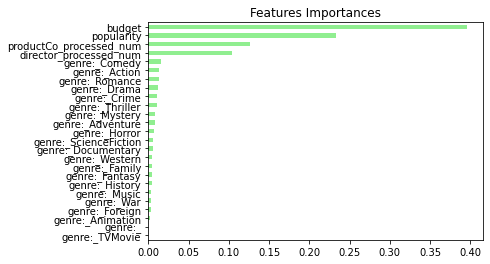

In [88]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

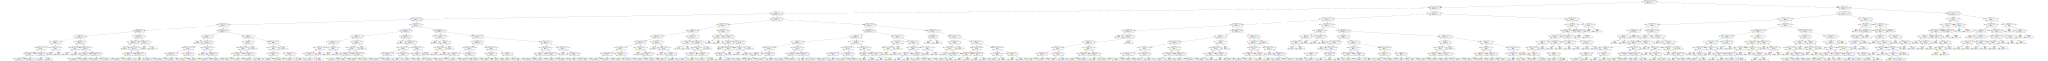

In [89]:
import graphviz


from IPython.display import display
from sklearn import tree

display(graphviz.Source(tree.export_graphviz(model)))